# TK24 gDNA sequencing analysis

Location types:
- variant
- exonic variant (located in gene)

Mutation types:
- SNP (single nucleotide polymorphism)
- InDel (insertion or deletion of < 50 bp of DNA)
- SV (structural variants of > 50 bp of DNA)
- CNV (copy number variation)

In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# get the file path of the file in the input folder to open them as a dataframe
def get_file_path(file_name: str):
        
    cwd = os.getcwd()
    file_path = cwd + '\\input\\' + file_name

    return file_path

In [3]:
# select all files belonging to the mutant
data_mut = []
for filename in os.listdir('./input'):
    if 'mut' in filename:
        data_mut.append(filename)

# select all files belonging to the wild type
data_wt = []
for filename in os.listdir('./input'):
    if 'wt' in filename:
        data_wt.append(filename)

In [4]:
num = 5

In [5]:
print(data_mut[num])
df_mut = pd.read_csv(get_file_path(data_mut[num]), sep='\t')

mut.sv.avinput.variant_function


In [6]:
print(data_wt[num])
df_wt = pd.read_csv(get_file_path(data_wt[num]), sep='\t')

wt.sv.avinput.variant_function


In [7]:
df_mut

,#LINE_ID,ANNO_REGION,ANNOTATION,CHROM,POS1,POS2,REF,ALT,TYPE of SV,SIZE of SV
0,line1,exonic,gene-SLIV_00465,CP009124.1,92704,92988,0,-,Deletion,DEL:a 270bp deletion
1,line2,exonic,"gene-SLIV_00845,gene-SLIV_00850",CP009124.1,165960,166239,0,-,Deletion,DEL:a 279bp deletion
2,line3,exonic,"gene-SLIV_01525,gene-SLIV_01530",CP009124.1,317852,318130,0,-,Deletion,DEL:a 278bp deletion
3,line4,exonic,gene-SLIV_01805,CP009124.1,383979,384257,0,-,Deletion,DEL:a 276bp deletion
4,line5,exonic,gene-SLIV_03395,CP009124.1,719520,719826,0,-,Deletion,DEL:a 294bp deletion
...,...,...,...,...,...,...,...,...,...,...
80,line81,exonic,gene-SLIV_34330,CP009124.1,7606894,7607159,0,-,Deletion,DEL:a 268bp deletion
81,line82,exonic,"gene-SLIV_34920,gene-SLIV_34925",CP009124.1,7727025,7727337,0,-,Deletion,DEL:a 320bp deletion
82,line83,exonic,gene-SLIV_35965,CP009124.1,7954969,7955264,0,-,Deletion,DEL:a 290bp deletion
83,line84,exonic,gene-SLIV_36250,CP009124.1,8032372,8032758,0,-,Deletion,DEL:a 392bp deletion


In [8]:
df_wt

,#LINE_ID,ANNO_REGION,ANNOTATION,CHROM,POS1,POS2,REF,ALT,TYPE of SV,SIZE of SV


In [9]:
cond = df_mut['ANNOTATION'].isin(df_wt['ANNOTATION'])
df_mut.drop(df_mut[cond].index, inplace = True)

In [10]:
df_mut

,#LINE_ID,ANNO_REGION,ANNOTATION,CHROM,POS1,POS2,REF,ALT,TYPE of SV,SIZE of SV
0,line1,exonic,gene-SLIV_00465,CP009124.1,92704,92988,0,-,Deletion,DEL:a 270bp deletion
1,line2,exonic,"gene-SLIV_00845,gene-SLIV_00850",CP009124.1,165960,166239,0,-,Deletion,DEL:a 279bp deletion
2,line3,exonic,"gene-SLIV_01525,gene-SLIV_01530",CP009124.1,317852,318130,0,-,Deletion,DEL:a 278bp deletion
3,line4,exonic,gene-SLIV_01805,CP009124.1,383979,384257,0,-,Deletion,DEL:a 276bp deletion
4,line5,exonic,gene-SLIV_03395,CP009124.1,719520,719826,0,-,Deletion,DEL:a 294bp deletion
...,...,...,...,...,...,...,...,...,...,...
80,line81,exonic,gene-SLIV_34330,CP009124.1,7606894,7607159,0,-,Deletion,DEL:a 268bp deletion
81,line82,exonic,"gene-SLIV_34920,gene-SLIV_34925",CP009124.1,7727025,7727337,0,-,Deletion,DEL:a 320bp deletion
82,line83,exonic,gene-SLIV_35965,CP009124.1,7954969,7955264,0,-,Deletion,DEL:a 290bp deletion
83,line84,exonic,gene-SLIV_36250,CP009124.1,8032372,8032758,0,-,Deletion,DEL:a 392bp deletion


In [11]:
df_mut["size"] = df_mut["POS2"]- df_mut["POS1"]

In [12]:
df_mut

,#LINE_ID,ANNO_REGION,ANNOTATION,CHROM,POS1,POS2,REF,ALT,TYPE of SV,SIZE of SV,size
0,line1,exonic,gene-SLIV_00465,CP009124.1,92704,92988,0,-,Deletion,DEL:a 270bp deletion,284
1,line2,exonic,"gene-SLIV_00845,gene-SLIV_00850",CP009124.1,165960,166239,0,-,Deletion,DEL:a 279bp deletion,279
2,line3,exonic,"gene-SLIV_01525,gene-SLIV_01530",CP009124.1,317852,318130,0,-,Deletion,DEL:a 278bp deletion,278
3,line4,exonic,gene-SLIV_01805,CP009124.1,383979,384257,0,-,Deletion,DEL:a 276bp deletion,278
4,line5,exonic,gene-SLIV_03395,CP009124.1,719520,719826,0,-,Deletion,DEL:a 294bp deletion,306
...,...,...,...,...,...,...,...,...,...,...,...
80,line81,exonic,gene-SLIV_34330,CP009124.1,7606894,7607159,0,-,Deletion,DEL:a 268bp deletion,265
81,line82,exonic,"gene-SLIV_34920,gene-SLIV_34925",CP009124.1,7727025,7727337,0,-,Deletion,DEL:a 320bp deletion,312
82,line83,exonic,gene-SLIV_35965,CP009124.1,7954969,7955264,0,-,Deletion,DEL:a 290bp deletion,295
83,line84,exonic,gene-SLIV_36250,CP009124.1,8032372,8032758,0,-,Deletion,DEL:a 392bp deletion,386


array([[<AxesSubplot:title={'center':'size'}>]], dtype=object)

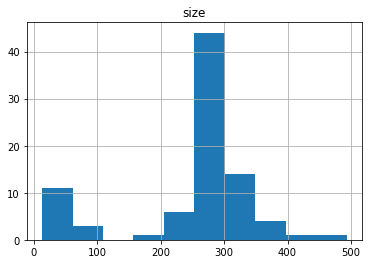

In [14]:
df_mut.hist(column='size')

In [15]:
df_mut.to_csv('sv_mut.csv')